In [1]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import os
drive.mount('/content/drive')

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
from keras import callbacks
from sklearn.model_selection import train_test_split

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/facial_expression/fer2013

/content/drive/MyDrive/facial_expression/fer2013


In [3]:
df = pd.read_csv('fer2013.csv')
label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'} 
img_array = np.stack(df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')), axis=0)
labels = df.emotion.values

X_train, X_test, y_train, y_test = train_test_split(img_array, labels, test_size=0.1, random_state=2)

X_train = X_train/255
X_test = X_test/255

In [4]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization

In [5]:
basemodel1 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(512,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(64, activation='relu'),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

basemodel4 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(512,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(64, activation='relu'),
                                        tf.keras.layers.Dense(64, activation='relu'),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

basemodel16 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(512,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(64, activation='relu'),
                                        tf.keras.layers.Dense(64, activation='relu'),
                                        tf.keras.layers.Dense(64, activation='relu'),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

basemodel32 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(512,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(64, activation='relu'),
                                        tf.keras.layers.Dense(64, activation='relu'),
                                        tf.keras.layers.Dense(64, activation='relu'),
                                        tf.keras.layers.Dense(64, activation='relu'),
                                        tf.keras.layers.Dense(64, activation='relu'),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

basemodel64 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Conv2D(512,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(64, activation='relu'),
                                        tf.keras.layers.Dense(64, activation='relu'),
                                        tf.keras.layers.Dense(64, activation='relu'),
                                        tf.keras.layers.Dense(64, activation='relu'),
                                        tf.keras.layers.Dense(64, activation='relu'),
                                        tf.keras.layers.Dense(64, activation='relu'),
                                        tf.keras.layers.Dense(64, activation='relu'),
                                        tf.keras.layers.Dense(64, activation='relu'),
                                        tf.keras.layers.Dense(64, activation='relu'),
                                        tf.keras.layers.Dense(64, activation='relu'),
                                        tf.keras.layers.Dropout(0.25),
                                        #
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

In [6]:
basemodel1.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [7]:
basemodel4.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [8]:
basemodel16.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [9]:
basemodel32.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [10]:
basemodel64.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [11]:
try:
  os.mkdir("checkpoint")
except:
  pass

file_name = 'best_model.h5'
checkpoint_path= os.path.join('checkpoint',file_name)
print(checkpoint_path)
call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_accuracy', 
                                                 verbose=1,
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

checkpoint/best_model.h5


In [12]:
from keras import callbacks
filename1='model1_train_new.csv'
filename4='model4_train_new.csv'
filename16='model16_train_new.csv'
filename32='model32_train_new.csv'
filename64='model64_train_new.csv'

filepath1 = os.path.join('checkpoint', filename1)
filepath4 = os.path.join('checkpoint', filename4)
filepath16 = os.path.join('checkpoint', filename16)
filepath32 = os.path.join('checkpoint', filename32)
filepath64 = os.path.join('checkpoint', filename64)

checkpoint1 = callbacks.ModelCheckpoint(filepath1, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpoint4 = callbacks.ModelCheckpoint(filepath4, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpoint16 = callbacks.ModelCheckpoint(filepath16, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpoint32 = callbacks.ModelCheckpoint(filepath32, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
checkpoint64 = callbacks.ModelCheckpoint(filepath64, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max')

In [13]:
hist1 = basemodel1.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test) ,callbacks=checkpoint1)

Epoch 1/20
1010/1010 [==============================] - 40s 9ms/step - loss: 1.7608 - accuracy: 0.2791 - val_loss: 1.5826 - val_accuracy: 0.3711

Epoch 00001: val_accuracy improved from -inf to 0.37113, saving model to checkpoint/model1_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model1_train_new.csv/assets
Epoch 2/20
1010/1010 [==============================] - 8s 8ms/step - loss: 1.5577 - accuracy: 0.3859 - val_loss: 1.4625 - val_accuracy: 0.4372

Epoch 00002: val_accuracy improved from 0.37113 to 0.43717, saving model to checkpoint/model1_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model1_train_new.csv/assets
Epoch 3/20
1010/1010 [==============================] - 8s 8ms/step - loss: 1.4551 - accuracy: 0.4331 - val_loss: 1.3946 - val_accuracy: 0.4547

Epoch 00003: val_accuracy improved from 0.43717 to 0.45472, saving model to checkpoint/model1_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model1_train_new.csv/assets
Epoch 4/20
1010/1010 

In [14]:
hist4 = basemodel4.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test) ,callbacks=checkpoint4)

Epoch 1/20
1010/1010 [==============================] - 9s 9ms/step - loss: 1.8027 - accuracy: 0.2508 - val_loss: 1.7061 - val_accuracy: 0.3079

Epoch 00001: val_accuracy improved from -inf to 0.30789, saving model to checkpoint/model4_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model4_train_new.csv/assets
Epoch 2/20
1010/1010 [==============================] - 8s 8ms/step - loss: 1.5716 - accuracy: 0.3863 - val_loss: 1.4308 - val_accuracy: 0.4333

Epoch 00002: val_accuracy improved from 0.30789 to 0.43327, saving model to checkpoint/model4_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model4_train_new.csv/assets
Epoch 3/20
1010/1010 [==============================] - 8s 8ms/step - loss: 1.4091 - accuracy: 0.4607 - val_loss: 1.3361 - val_accuracy: 0.4837

Epoch 00003: val_accuracy improved from 0.43327 to 0.48370, saving model to checkpoint/model4_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model4_train_new.csv/assets
Epoch 4/20
1010/1010 [

In [15]:
hist16 = basemodel16.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test) ,callbacks=checkpoint16)

Epoch 1/20
1010/1010 [==============================] - 10s 9ms/step - loss: 1.7520 - accuracy: 0.2801 - val_loss: 1.5881 - val_accuracy: 0.3739

Epoch 00001: val_accuracy improved from -inf to 0.37392, saving model to checkpoint/model16_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model16_train_new.csv/assets
Epoch 2/20
1010/1010 [==============================] - 9s 9ms/step - loss: 1.5301 - accuracy: 0.4049 - val_loss: 1.4667 - val_accuracy: 0.4174

Epoch 00002: val_accuracy improved from 0.37392 to 0.41739, saving model to checkpoint/model16_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model16_train_new.csv/assets
Epoch 3/20
1010/1010 [==============================] - 9s 9ms/step - loss: 1.4128 - accuracy: 0.4576 - val_loss: 1.3615 - val_accuracy: 0.4731

Epoch 00003: val_accuracy improved from 0.41739 to 0.47311, saving model to checkpoint/model16_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model16_train_new.csv/assets
Epoch 4/20
1010

In [16]:
hist32 = basemodel32.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test) ,callbacks=checkpoint32)

Epoch 1/20
1010/1010 [==============================] - 9s 9ms/step - loss: 1.8255 - accuracy: 0.2429 - val_loss: 1.7565 - val_accuracy: 0.2549

Epoch 00001: val_accuracy improved from -inf to 0.25495, saving model to checkpoint/model32_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model32_train_new.csv/assets
Epoch 2/20
1010/1010 [==============================] - 9s 9ms/step - loss: 1.6882 - accuracy: 0.3220 - val_loss: 1.5835 - val_accuracy: 0.3619

Epoch 00002: val_accuracy improved from 0.25495 to 0.36194, saving model to checkpoint/model32_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model32_train_new.csv/assets
Epoch 3/20
1010/1010 [==============================] - 9s 9ms/step - loss: 1.5454 - accuracy: 0.3913 - val_loss: 1.4868 - val_accuracy: 0.4107

Epoch 00003: val_accuracy improved from 0.36194 to 0.41070, saving model to checkpoint/model32_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model32_train_new.csv/assets
Epoch 4/20
1010/

In [17]:
hist64 = basemodel64.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test) ,callbacks=checkpoint64)

Epoch 1/20
1010/1010 [==============================] - 10s 9ms/step - loss: 1.8234 - accuracy: 0.2471 - val_loss: 1.8038 - val_accuracy: 0.2510

Epoch 00001: val_accuracy improved from -inf to 0.25104, saving model to checkpoint/model64_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model64_train_new.csv/assets
Epoch 2/20
1010/1010 [==============================] - 9s 9ms/step - loss: 1.6975 - accuracy: 0.3122 - val_loss: 1.5854 - val_accuracy: 0.3583

Epoch 00002: val_accuracy improved from 0.25104 to 0.35832, saving model to checkpoint/model64_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model64_train_new.csv/assets
Epoch 3/20
1010/1010 [==============================] - 9s 9ms/step - loss: 1.5601 - accuracy: 0.3795 - val_loss: 1.4962 - val_accuracy: 0.4099

Epoch 00003: val_accuracy improved from 0.35832 to 0.40986, saving model to checkpoint/model64_train_new.csv
INFO:tensorflow:Assets written to: checkpoint/model64_train_new.csv/assets
Epoch 4/20
1010

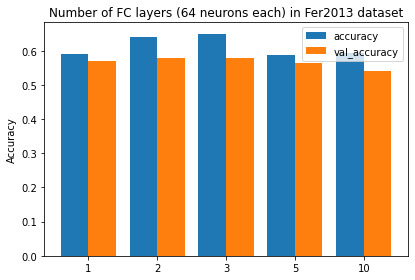

In [18]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['1', '2', '3', '5', '10']
accuracy = [np.amax(hist1.history['accuracy']),
            np.amax(hist4.history['accuracy']),
             np.amax(hist16.history['accuracy']),
             np.amax(hist32.history['accuracy']),
             np.amax(hist64.history['accuracy'])]
                       
val_accuracy = [np.amax(hist1.history['val_accuracy']),
                np.amax(hist4.history['val_accuracy']),
             np.amax(hist16.history['val_accuracy']),
             np.amax(hist32.history['val_accuracy']),
             np.amax(hist64.history['val_accuracy'])]

x = np.arange(len(labels))  # the label locations
width = 0.40  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy, width, label='accuracy')
rects2 = ax.bar(x + width/2, val_accuracy, width, label='val_accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Number of FC layers (64 neurons each) in Fer2013 dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()